# Pregunta 7. Consulta datos agrupados por un campo categórico.

Mostrar:
- Agrupar por campo categorico sino crearlo
- Grafico de todas las categorias

### IMPORTS
---

In [151]:
import pandas as pd
import numpy as np
import copy

### RAW DATAFRAME
---

In [152]:
data: pd.DataFrame = pd.read_csv("../data/cleaned_csv/3-question_results/cases.csv", index_col="case_id")
data.head(10)

,year,month,state,location,species,status,illnesses,hospitalizations,fatalities
case_id,,,,,,,,,
1,1998,January,California,Restaurant,NaN,NaN,20,0.0,0.0
2,1998,January,California,NaN,NaN,NaN,112,0.0,0.0
3,1998,January,California,Restaurant,NaN,NaN,35,0.0,0.0
4,1998,January,California,Restaurant,Scombroid toxin,Confirmed,4,0.0,0.0
5,1998,January,California,Private Home/Residence,Salmonella enterica,Confirmed,26,3.0,0.0
6,1998,January,California,Restaurant,Shigella boydii,Confirmed,25,3.0,0.0
7,1998,January,California,Restaurant,NaN,NaN,8,0.0,0.0
8,1998,January,California,Restaurant,Salmonella enterica,Confirmed,4,3.0,0.0
9,1998,January,Colorado,Restaurant,Virus,Suspected,21,NaN,NaN


### CATEGORICAL
---

- Columna categorica 'status'
- Valores Confirmado / Sospechoso

---

- Cambiamos el tipo de dato

In [153]:
data.loc[:, "status"] = data.loc[:, "status"].astype("category")
data.loc[:, "status"]

case_id
1              NaN
2              NaN
3              NaN
4        Confirmed
5        Confirmed
           ...    
17391    Confirmed
17392    Confirmed
17393    Confirmed
17394    Confirmed
17395          NaN
Name: status, Length: 17395, dtype: category
Categories (2, object): ['Confirmed', 'Suspected']

- Quitar duplicados

In [154]:
unique_status: pd.Series = data.loc[:, "status"].drop_duplicates()
unique_status

case_id
1          NaN
4    Confirmed
9    Suspected
Name: status, dtype: category
Categories (2, object): ['Confirmed', 'Suspected']

- Agrupamos por casos confirmados con una mascara

In [155]:
confirmed_mask = data.loc[:,"status"] == 'Confirmed'
confirmed_mask
confirmed_mask.value_counts()

data_confirmed = data.loc[confirmed_mask, :]
data_confirmed


,year,month,state,location,species,status,illnesses,hospitalizations,fatalities
case_id,,,,,,,,,
4,1998,January,California,Restaurant,Scombroid toxin,Confirmed,4,0.0,0.0
5,1998,January,California,Private Home/Residence,Salmonella enterica,Confirmed,26,3.0,0.0
6,1998,January,California,Restaurant,Shigella boydii,Confirmed,25,3.0,0.0
8,1998,January,California,Restaurant,Salmonella enterica,Confirmed,4,3.0,0.0
21,1998,January,Florida,Restaurant,Campylobacter unknown,Confirmed,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...
17389,2015,December,Wisconsin,Banquet Facility,Norovirus genogroup II,Confirmed,20,0.0,0.0
17391,2015,December,Wisconsin,Restaurant,Norovirus genogroup II,Confirmed,4,0.0,0.0
17392,2015,December,Wisconsin,Private Home/Residence,Norovirus genogroup II,Confirmed,16,0.0,0.0


### Datos generales de enfermos por mes y año
- Agrupamos por año y mes el número de enfermos y mostramos una gráfica

<AxesSubplot:xlabel='year,month'>

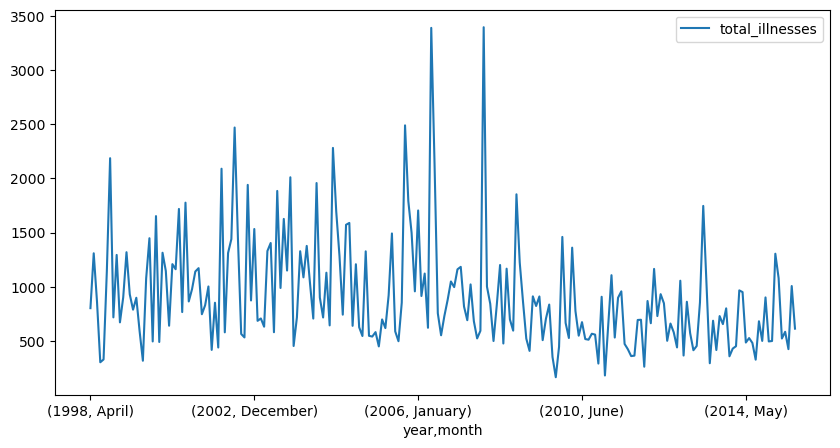

In [156]:
test1 = data_confirmed.groupby(by=['year', 'month']).agg( total_illnesses = ('illnesses', 'sum') )
test1.plot(figsize=(10,5))

- Si solo queremos ver el año 2006 en el gráfico

In [157]:
group_by_2006 = test1.iloc[97:108, :]
sorted= group_by_2006.sort_values('month')
sorted

total_illnesses
year month                     
2006 August                1791
     December              1498
     February               958
     January               1704
     July                   915
     June                  1122
     March                  622
     May                   3388
     November              2140
     October                756
     September              553

<AxesSubplot:xlabel='year,month'>

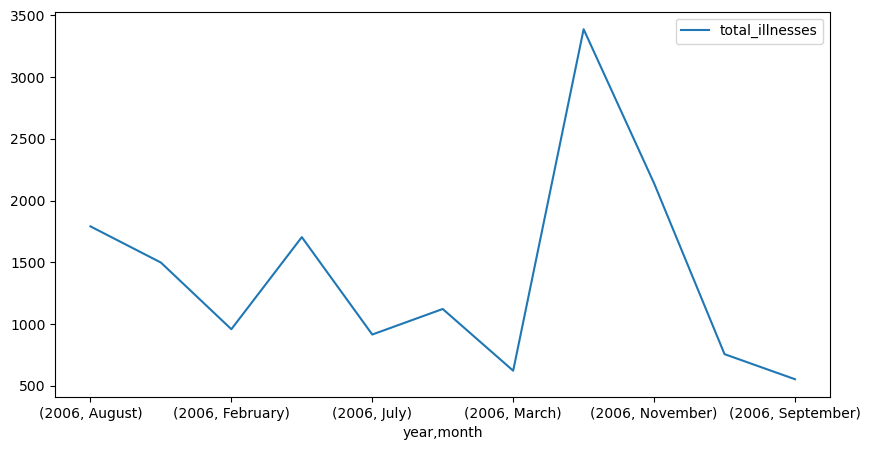

In [158]:
group_by_2006.plot(figsize=(10,5))

- Si queremos saber los datos de enero del año 2001 de los casos confirmados.

In [159]:
y2001_january_mask = (data_confirmed.loc[:, 'year'] == 2001) & (data_confirmed.loc[:, 'month'] == 'January')  

y2001_january=data_confirmed.loc[y2001_january_mask , :]
